In [1]:
# くずし字 平仮名49クラスを分類

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb

from sklearn.metrics import confusion_matrix, accuracy_score


In [3]:
cl_map = pd.read_csv('./dataset/kuzushiji/k49_classmap.csv')

In [4]:
cl_map.shape

(49, 3)

In [5]:
print(cl_map.shape)

(49, 3)


In [6]:
# 訓練データの読み込み
X_train = np.load('./dataset/kuzushiji/k49-train-imgs.npz')['arr_0']
y_train = np.load('./dataset/kuzushiji/k49-train-labels.npz')['arr_0']

In [7]:
# テストデータの読み込み
X_test = np.load('./dataset/kuzushiji/k49-test-imgs.npz')['arr_0']
y_test = np.load('./dataset/kuzushiji/k49-test-labels.npz')['arr_0']

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((232365, 28, 28), (232365,), (38547, 28, 28), (38547,))

In [9]:
y_train[:5]

array([30, 19, 20, 30,  7], dtype=uint8)

In [10]:
cl_map_np = np.array(cl_map)

In [11]:
cl_map_np[[y_train[:5]], :]

array([[[30, 'U+307E', 'ま'],
        [19, 'U+3068', 'と'],
        [20, 'U+306A', 'な'],
        [30, 'U+307E', 'ま'],
        [7, 'U+304F', 'く']]], dtype=object)

In [12]:
cl_map_index = cl_map.set_index('index').to_dict()['char']

In [13]:
cl_map_index

{0: 'あ',
 1: 'い',
 2: 'う',
 3: 'え',
 4: 'お',
 5: 'か',
 6: 'き',
 7: 'く',
 8: 'け',
 9: 'こ',
 10: 'さ',
 11: 'し',
 12: 'す',
 13: 'せ',
 14: 'そ',
 15: 'た',
 16: 'ち',
 17: 'つ',
 18: 'て',
 19: 'と',
 20: 'な',
 21: 'に',
 22: 'ぬ',
 23: 'ね',
 24: 'の',
 25: 'は',
 26: 'ひ',
 27: 'ふ',
 28: 'へ',
 29: 'ほ',
 30: 'ま',
 31: 'み',
 32: 'む',
 33: 'め',
 34: 'も',
 35: 'や',
 36: 'ゆ',
 37: 'よ',
 38: 'ら',
 39: 'り',
 40: 'る',
 41: 'れ',
 42: 'ろ',
 43: 'わ',
 44: 'ゐ',
 45: 'ゑ',
 46: 'を',
 47: 'ん',
 48: 'ゝ'}

In [14]:
X_train.min(), X_train.max()

(0, 255)

In [15]:
y_train[423]

34

In [16]:
cl_map_np[[y_train[100]], :]

array([[18, 'U+3066', 'て']], dtype=object)

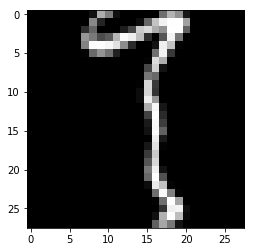

In [17]:
plt.imshow(X_train[100], cmap=plt.cm.gray)
plt.show()

In [18]:
cl_map_index[18]

'て'

In [19]:
X_train[0, 10:15, 10:15]

array([[  0,   0,   0,   0, 107],
       [  0,   0,   0,  68, 249],
       [  0,   0,   0, 177, 246],
       [  0,   0,  11, 243, 166],
       [  0,   1, 107, 255, 222]], dtype=uint8)

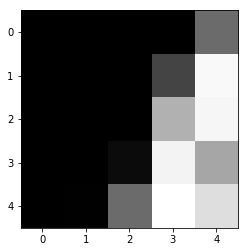

In [20]:
plt.imshow(X_train[0, 10:15, 10:15], cmap=plt.cm.gray)

In [21]:
cl_map_index[0]

'あ'

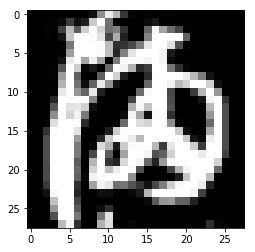

In [22]:
plt.imshow(X_train[0], cmap=plt.cm.gray)

In [23]:
# 正規化
X_train_n = X_train / 255
X_test_n = X_test / 255

In [24]:
X_train[0, 10:15, 10:15]

array([[  0,   0,   0,   0, 107],
       [  0,   0,   0,  68, 249],
       [  0,   0,   0, 177, 246],
       [  0,   0,  11, 243, 166],
       [  0,   1, 107, 255, 222]], dtype=uint8)

In [25]:
X_train_n[0, 10:15, 10:15]

array([[0.        , 0.        , 0.        , 0.        , 0.41960784],
       [0.        , 0.        , 0.        , 0.26666667, 0.97647059],
       [0.        , 0.        , 0.        , 0.69411765, 0.96470588],
       [0.        , 0.        , 0.04313725, 0.95294118, 0.65098039],
       [0.        , 0.00392157, 0.41960784, 1.        , 0.87058824]])

In [26]:
X_train_n = X_train_n.reshape(X_train_n.shape[0], -1)
X_test_n = X_test_n.reshape(X_test_n.shape[0], -1)

In [27]:
X_train_n.shape, X_test_n.shape

((232365, 784), (38547, 784))

In [28]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
# LightGBMのモデルへデータセットの初期化セット
train_data = lgb.Dataset(X_train_n, label=y_train)
test_data =  lgb.Dataset(X_test_n, label=y_test, reference=train_data)

In [30]:
# パラメータ
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 49,
    'verbose': 2
}

In [31]:
# 訓練
gbm = lgb.train(
    params,
    train_data,
    valid_sets=test_data,
    num_boost_round=100,
    verbose_eval=5,
)


[5]	valid_0's multi_logloss: 2.59453
[10]	valid_0's multi_logloss: 2.19114
[15]	valid_0's multi_logloss: 1.92914
[20]	valid_0's multi_logloss: 1.74188
[25]	valid_0's multi_logloss: 1.59385
[30]	valid_0's multi_logloss: 1.479
[35]	valid_0's multi_logloss: 1.38511
[40]	valid_0's multi_logloss: 1.30811
[45]	valid_0's multi_logloss: 1.2429
[50]	valid_0's multi_logloss: 1.18867
[55]	valid_0's multi_logloss: 1.14111
[60]	valid_0's multi_logloss: 1.09963
[65]	valid_0's multi_logloss: 1.06321
[70]	valid_0's multi_logloss: 1.03228
[75]	valid_0's multi_logloss: 1.00403
[80]	valid_0's multi_logloss: 0.9787
[85]	valid_0's multi_logloss: 0.954866
[90]	valid_0's multi_logloss: 0.933717
[95]	valid_0's multi_logloss: 0.912939
[100]	valid_0's multi_logloss: 0.895435


In [32]:
preds = gbm.predict(X_test_n)

In [33]:
preds.shape

(38547, 49)

In [34]:
y_pred = np.argmax(preds, axis=1)

In [35]:
y_pred.shape

(38547,)

In [36]:
confusion_matrix(y_test, y_pred)

array([[838,   5,   0, ...,   1,   1,   1],
       [  1, 905,   0, ...,   5,   1,   0],
       [  0,   0, 895, ...,   0,   0,   1],
       ...,
       [  0,   0,   1, ..., 879,   1,   0],
       [  0,   0,   0, ...,   1, 932,   0],
       [  0,   1,   8, ...,   0,   0, 400]], dtype=int64)

In [37]:
accuracy_score(y_test, y_pred)

0.7717332088100242